# Create Map of the World with location of tile data

Helper script to better understand the destribution of the data.

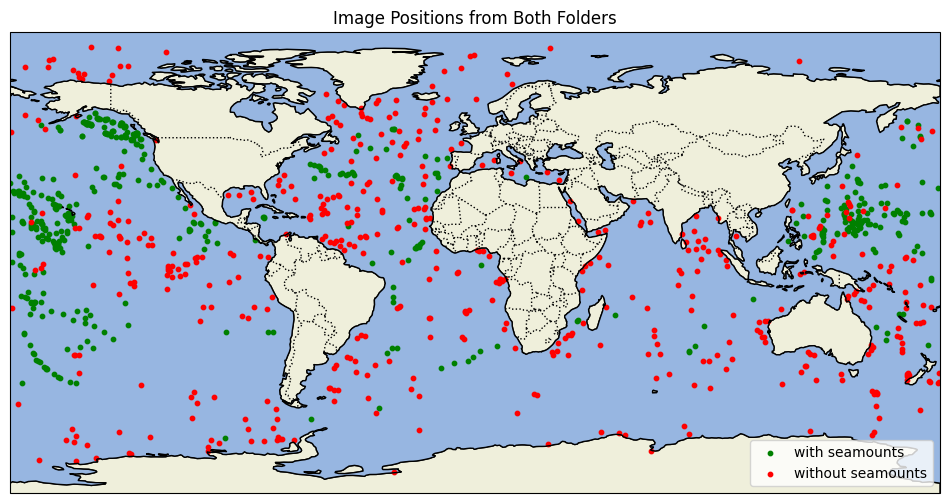

In [1]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Paths to folders and CSV file
folder1 = "../3_Model/temp_processed_data_241208/with_seamount_manual1"
folder2 = "../3_Model/temp_processed_data_241208/without_seamounts_manual1"
csv_file = "seamounts.csv"

# Load the CSV file
coordinates = pd.read_csv(csv_file)

# Function to extract coordinates from filenames
def extract_coordinates(folder, coordinates_df):
    coords = []
    for filename in os.listdir(folder):
        if filename.endswith(".png"):
            # Check for ID-based filenames (e.g., 123456.0.png)
            id_match = re.match(r"(\d+)\.0\.png", filename)
            if id_match:
                img_id = int(id_match.group(1))
                # Look up coordinates in the CSV
                row = coordinates_df[coordinates_df['PEAKID'] == img_id]
                if not row.empty:
                    lat, lon = row.iloc[0]['LAT'], row.iloc[0]['LONG']
                    coords.append((lat, lon))
            else:
                # Check for tile-based filenames (e.g., tile_lat_lon.png)
                tile_match = re.match(r"tile_(\-?\d+\.\d+)_(\-?\d+\.\d+)\.png", filename)
                if tile_match:
                    lat, lon = float(tile_match.group(1)), float(tile_match.group(2))
                    coords.append((lat, lon))
    return coords

# Extract coordinates for both folders
folder1_coords = extract_coordinates(folder1, coordinates)
folder2_coords = extract_coordinates(folder2, coordinates)

# Plot the world map
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12, 8))
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Plot the coordinates
if folder1_coords:
    lats, lons = zip(*folder1_coords)
    ax.scatter(lons, lats, color='green', label='with seamounts', transform=ccrs.PlateCarree(), s=10)

if folder2_coords:
    lats, lons = zip(*folder2_coords)
    ax.scatter(lons, lats, color='red', label='without seamounts', transform=ccrs.PlateCarree(), s=10)

# Add legend and title
ax.legend()
ax.set_title("Image Positions from Both Folders")

# Show the map
plt.show()
